In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from enum import StrEnum

plt.rcdefaults()
plt.rc('axes.formatter', use_mathtext=True)
plt.rc('figure', dpi=100)
font = {
    'family' : 'serif',
    'size'   : 12,
    'serif':  'cmr10'
}
plt.rc('font', **font)

In [2]:
# colors
class color(StrEnum):
    LeNet = "green"
    AlexNet = "blue"
    AlexNetVIB = "black"
    AlexNetMCDO = "red"
    AlexNetTH_VIB = "orange"
    VGG = "dodgerblue"
    ResNet = "saddlebrown"

    @classmethod
    def from_model_name(cls, model_name):
        return cls[model_name].value

In [3]:
def replace_customnet(model_name):
    if model_name == "CustomNet":
        return "AlexNetTH_VIB"
    return model_name

# Train Analysis

In [4]:
train_path = "/workspace/result/train"
model_paths = os.listdir(train_path)
model_path_stg = {}
for model_path in model_paths:
    model_path_stg[model_path] = glob.glob(f"{train_path}/{model_path}/**data**/**.csv", recursive=True)

train_dfs = {} 
for model, path in model_path_stg.items():
    train_dfs[model] = [pd.read_csv(filename, index_col=None, header=0) for filename in model_path_stg[model]]


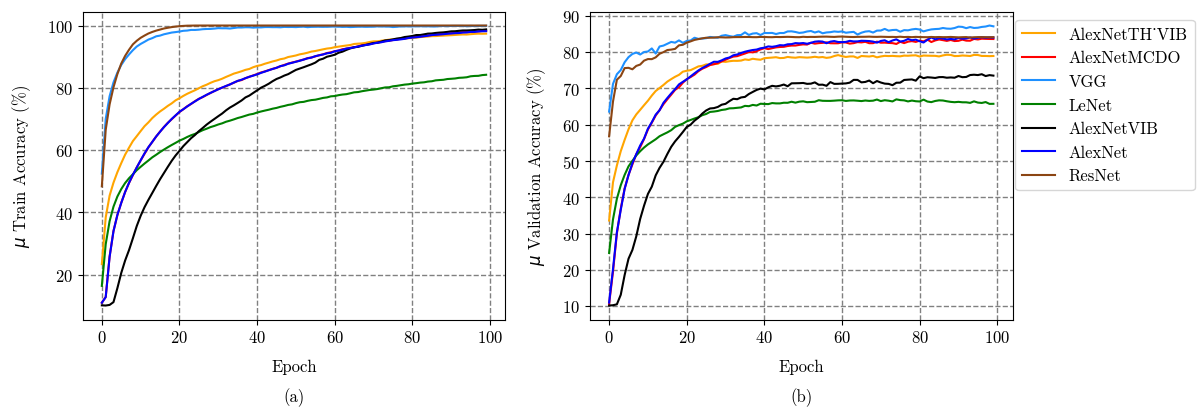

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharex=True)
axes = axes.flatten()

cols = ["Train Accuracy", "Validation Accuracy"]
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)" ]


for idx, col in enumerate(cols):
    ax = axes[idx]
    for model_name, df_s in train_dfs.items():

        model_name = replace_customnet(model_name=model_name)
        df_mean = np.mean([df[col].values for df in df_s], axis=0) 
        # print(model_name, np.round(df_mean[-1], 2))
        ax.plot(range(len(df_mean)), df_mean, color.from_model_name(model_name), label=model_name)

    ax.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
    # ax.minorticks_on()  # Enable minor ticks
    # ax.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style

    ax.set_xlabel("Epoch", fontsize=12, labelpad=10)
    ax.text(0.5, -0.22, labels[idx], transform=ax.transAxes, fontsize=12, fontweight='bold',  ha='center', va='top')
    ax.set_ylabel(fr"$\mu$ {col} (%)", fontsize=12, labelpad=10)
    # ax.set_ylim([-5,105])
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("Epoch", fontsize=12, labelpad=10)
plt.legend(loc='best', bbox_to_anchor=(1.45, 1))

plt.savefig("/workspace/images/train.svg")
plt.show()

AlexNetTH_VIB 0.92
AlexNetMCDO 0.64
VGG 0.68
LeNet 1.23
AlexNetVIB 1.53
AlexNet 0.72
ResNet 0.61


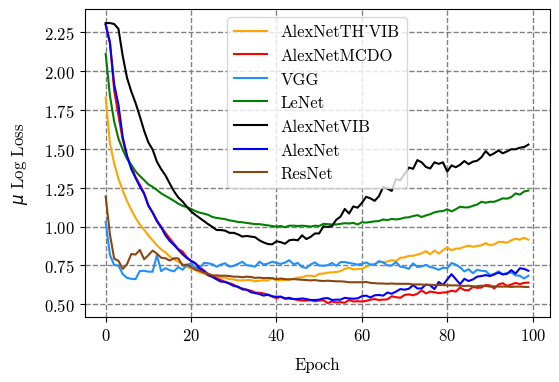

In [6]:
plt.figure(figsize=(6,4))

cols = ["Log Loss"]
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)" ]


for idx, col in enumerate(cols):
    for model_name, df_s in train_dfs.items():

        model_name = replace_customnet(model_name=model_name)
        df_mean = np.mean([df[col].values for df in df_s], axis=0) 
        print(model_name, np.round(df_mean[-1], 2))
        plt.plot(range(len(df_mean)), df_mean, color.from_model_name(model_name), label=model_name)

    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  

    plt.xlabel("Epoch", fontsize=12, labelpad=10)
    plt.ylabel(fr"$\mu$ {col}", fontsize=12, labelpad=10)
plt.legend()

# plt.savefig("/workspace/images/entropy_reduction.svg")
plt.show()

AlexNetTH_VIB 0.22
AlexNetMCDO 0.21
VGG 0.09
LeNet 0.5
AlexNetVIB 0.18
AlexNet 0.15
ResNet 0.2


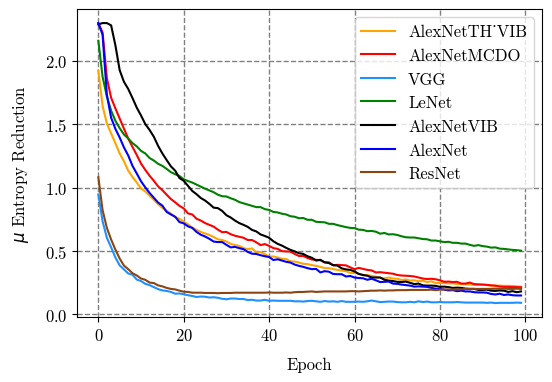

In [10]:
plt.figure(figsize=(6,4))

cols = ["Entropy Reduction"]
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)" ]


for idx, col in enumerate(cols):
    for model_name, df_s in train_dfs.items():

        model_name = replace_customnet(model_name=model_name)
        df_mean = np.mean([df[col].values for df in df_s], axis=0)
        print(model_name, np.round(df_mean[-1], 2))
        plt.plot(range(len(df_mean)), df_mean, color.from_model_name(model_name), label=model_name)

    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  

    plt.xlabel("Epoch", fontsize=12, labelpad=10)
    plt.ylabel(fr"$\mu$ {col}", fontsize=12, labelpad=10)
plt.legend()

# plt.savefig("/workspace/images/entropy_reduction.svg")
plt.show()

AlexNetTH_VIB 91.6
AlexNetMCDO 91.8
VGG 96.8
LeNet 81.6
AlexNetVIB 93.0
AlexNet 94.0
ResNet 93.0


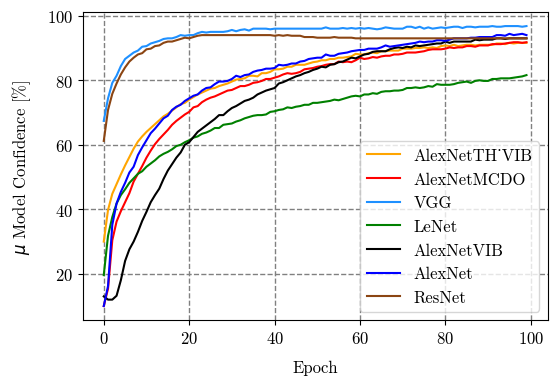

In [14]:
plt.figure(figsize=(6,4))

cols = ["Model Confidence"]
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)" ]


for idx, col in enumerate(cols):
    for model_name, df_s in train_dfs.items():

        model_name = replace_customnet(model_name=model_name)
        df_mean = np.mean([df[col].values for df in df_s], axis=0) * 100
        print(model_name, np.round(df_mean[-1], 2))
        plt.plot(range(len(df_mean)), df_mean, color.from_model_name(model_name), label=model_name)

    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  

    plt.xlabel("Epoch", fontsize=12, labelpad=10)
    plt.ylabel(fr"$\mu$ {col} [%]", fontsize=12, labelpad=10)
plt.legend()

# plt.savefig("/workspace/images/model_conficence.svg")
plt.show()

# Single Data analysis

In [ ]:
lenet_df = pd.read_csv(f"{train_path}/LeNet/data-18-01-2025/LeNet_train_eval_42.csv")
alexnetvib_df = pd.read_csv(f"{train_path}/AlexNetVIB/data-18-01-2025/AlexNetVIB_train_eval_42.csv")
alexnet_df = pd.read_csv(f"{train_path}/AlexNet/data-18-01-2025/AlexNet_train_eval_42.csv")
alexnetmcdo_df = pd.read_csv(f"{train_path}/AlexNetMCDO/data-18-01-2025/AlexNetMCDO_train_eval_42.csv")
customnet_df = pd.read_csv(f"{train_path}/CustomNet/data-19-01-2025/CustomNet_train_eval_42.csv")
vgg_df = pd.read_csv(f"{train_path}/VGG/data-18-01-2025/VGG_train_eval_42.csv")
resnet_df = pd.read_csv(f"{train_path}/ResNet/data-18-01-2025/ResNet_train_eval_42.csv")

In [ ]:
lenet_df.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alexnet_df.index, alexnet_df["Validation Accuracy"], color.AlexNet, label=fr'AlexNet Mean ± Std')
plt.plot(alexnetvib_df.index, alexnetvib_df["Validation Accuracy"], color=color.AlexNetVIB, label=fr'AlexNetVIB Mean ± Std')
plt.plot(alexnetmcdo_df.index, alexnetmcdo_df["Validation Accuracy"], color=color.AlexNetMCDO, label=fr'AlexNetMCDO Mean ± Std')
plt.plot(lenet_df.index, lenet_df["Validation Accuracy"], color=color.LeNet, label=f'LeNet Mean ± Std')
plt.plot(vgg_df.index, vgg_df["Validation Accuracy"], color=color.VGG, label=fr'VGG Mean ± Std')
plt.plot(resnet_df.index, resnet_df["Validation Accuracy"], color=color.ResNet, label=f'ResNet Mean ± Std')
plt.plot(customnet_df.index, customnet_df["Validation Accuracy"], color=color.AlexNetTH_VIB, label=r'AlexNetTH_VIB Mean ± Std')

plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style

# plt.errorbar(alexnet_df.index, alexnet_df["Validation Accuracy"], yerr=alexnet_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNet Mean ± Std')
# plt.errorbar(alexnetvib_df.index, alexnetvib_df["Validation Accuracy"], yerr=alexnetvib_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNetVIB Mean ± Std')
plt.legend()
plt.show()

In [ ]:
plt.plot(lenet_df.index, lenet_df["Train Accuracy"])
plt.plot(lenet_df.index, lenet_df["Validation Accuracy"])
plt.show()

In [ ]:
# Entropy

cols = ["Train Accuracy", "Validation Accuracy"]
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)" ]


for idx, col in enumerate(cols):
    ax = axes[idx]
    for model_name, df_s in train_dfs.items():
        sns.kdeplot(x=lenet_df["Entropy Reduction"], label="LeNet")
        sns.kdeplot(x=alexnetvib_df["Entropy Reduction"], label="AlexNetVIB")
        sns.kdeplot(x=alexnet_df["Entropy Reduction"], label="AlexNet")
        sns.kdeplot(x=alexnetmcdo_df["Entropy Reduction"], label="AlexNetMCDO")
        sns.kdeplot(x=customnet_df["Entropy Reduction"], label="AlexNetTH_VIB")
        # sns.kdeplot(x=vgg_df["Entropy Reduction"], label="VGG", fill=True)
        # sns.kdeplot(x=resnet_df["Entropy Reduction"], label="ResNet", fill=True)
plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
# plt.minorticks_on()  # Enable minor ticks
# plt.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alexnet_df.index, alexnet_df["Top 1 Error"], color.AlexNet, label=f'AlexNet Mean ± Std')
plt.plot(alexnetvib_df.index, alexnetvib_df["Top 1 Error"], color=color.AlexNetVIB, label=f'AlexNetVIB Mean ± Std')
plt.plot(alexnetmcdo_df.index, alexnetmcdo_df["Top 1 Error"], color=color.AlexNetMCDO, label=f'AlexNetMCDO Mean ± Std')
plt.plot(lenet_df.index, lenet_df["Top 1 Error"], color=color.LeNet, label=f'LeNet Mean ± Std')
plt.plot(vgg_df.index, vgg_df["Top 1 Error"], color=color.VGG, label=f'VGG Mean ± Std')
plt.plot(resnet_df.index, resnet_df["Top 1 Error"], color=color.ResNet, label=f'ResNet Mean ± Std')
plt.plot(customnet_df.index, customnet_df["Top 1 Error"], color=color.CustomNet, label=f'CustomNet Mean ± Std')

plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style

# plt.errorbar(alexnet_df.index, alexnet_df["Validation Accuracy"], yerr=alexnet_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNet Mean ± Std')
# plt.errorbar(alexnetvib_df.index, alexnetvib_df["Validation Accuracy"], yerr=alexnetvib_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNetVIB Mean ± Std')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(alexnet_df.index, alexnet_df["Top 5 Error"], color.AlexNet, label=f'AlexNet Mean ± Std')
plt.plot(alexnetvib_df.index, alexnetvib_df["Top 5 Error"], color=color.AlexNetVIB, label=f'AlexNetVIB Mean ± Std')
plt.plot(alexnetmcdo_df.index, alexnetmcdo_df["Top 5 Error"], color=color.AlexNetMCDO, label=f'AlexNetMCDO Mean ± Std')
plt.plot(lenet_df.index, lenet_df["Top 5 Error"], color=color.LeNet, label=f'LeNet Mean ± Std')
plt.plot(vgg_df.index, vgg_df["Top 5 Error"], color=color.VGG, label=f'VGG Mean ± Std')
plt.plot(resnet_df.index, resnet_df["Top 5 Error"], color=color.ResNet, label=f'ResNet Mean ± Std')
plt.plot(customnet_df.index, customnet_df["Top 5 Error"], color=color.AlexNetTH_VIB, label=f'AlexNetTH_VIB Mean ± Std')

plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)  # Dashed grid
plt.minorticks_on()  # Enable minor ticks
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)  # Minor grid lines with dotted style

# plt.errorbar(alexnet_df.index, alexnet_df["Validation Accuracy"], yerr=alexnet_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNet Mean ± Std')
# plt.errorbar(alexnetvib_df.index, alexnetvib_df["Validation Accuracy"], yerr=alexnetvib_df["Top 1 Error"], fmt='.', capsize=5, label=f'AlexNetVIB Mean ± Std')
plt.legend()
plt.show()

In [ ]:
x = lenet_df.index.values
y_train = lenet_df["Train Accuracy"].value
y_test = lenet_df["Validation Accuracy"].values
#some confidence interval
# ci_train = 1.96 * np.std(y_train)/np.sqrt(len(x))
ci_test = 1.96 * np.std(y_test)/np.sqrt(len(x))
# print("ci_train", ci_train)
print("ci_test", ci_test)

fig, ax = plt.subplots()
# ax.plot(x,y_train)
# ax.fill_between(x, (y_train-ci_train), (y_train+ci_train), color='b', alpha=.1)

ax.plot(x,y_test, color="g")
ax.fill_between(x, (y_test-ci_test), (y_test+ci_test), color='g', alpha=.1)
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

# Simulated accuracy scores over multiple runs/epochs
accuracies = lenet_df["Validation Accuracy"].values

# Compute mean and standard error
mean_acc = np.mean(accuracies)
std_err = stats.sem(accuracies)  # Standard error

def confidence_interval(confidence_level):
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=len(accuracies) - 1)  # T-distribution critical value
    margin_of_error = t_critical * std_err
    return mean_acc - margin_of_error, mean_acc + margin_of_error

# Compute 90%, 95%, and 99% Confidence Intervals
ci_90 = confidence_interval(0.90)
ci_95 = confidence_interval(0.95)
ci_99 = confidence_interval(0.99)

# Print results
print(f"Mean Accuracy: {mean_acc:.4f}")
print(f"90% CI:  ({ci_90[0]:.4f}, {ci_90[1]:.4f})")
print(f"95% CI:  ({ci_95[0]:.4f}, {ci_95[1]:.4f})")
print(f"99% CI:  ({ci_99[0]:.4f}, {ci_99[1]:.4f})")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming 'lenet_df' is already defined and contains the required data
x = lenet_df.index.values
y_test = lenet_df["Validation Accuracy"].values

# Compute the mean and standard error for each point
mean_acc = np.mean(y_test)
std_err = np.std(y_test, ddof=1) / np.sqrt(len(x))  # Standard error with Bessel’s correction

# Confidence Interval Function for each point
def confidence_interval_per_point(y_values, confidence_level):
    # Calculate standard error for each point
    std_err_per_point = np.std(y_values, ddof=1) / np.sqrt(len(y_values))
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=len(y_values) - 1)  # T-distribution critical value
    margin_of_error = t_critical * std_err_per_point
    return y_values - margin_of_error, y_values + margin_of_error

# Calculate per-point confidence intervals
ci_lower = np.array([confidence_interval_per_point([val], 0.95)[0] for val in y_test])
ci_upper = np.array([confidence_interval_per_point([val], 0.95)[1] for val in y_test])

# Plot
fig, ax = plt.subplots()
ax.plot(x, y_test, color="g", label="Validation Accuracy")
ax.fill_between(x, ci_lower.flatten(), ci_upper.flatten(), color='g', alpha=0.5, label="95% CI")
print(ci_lower, ci_upper.flatten())

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Accuracy with 95% Confidence Interval")
plt.show()


In [ ]:
x = alexnetvib_df.index.values
y_train = alexnetvib_df["Train Accuracy"].values
y_test = alexnetvib_df["Validation Accuracy"].values
#some confidence interval
ci_train = 1.96 * np.std(y_train)/np.sqrt(len(x))
ci_test = 1.96 * np.std(y_test)/np.sqrt(len(x))
print("ci_train", ci_train)
print("ci_test", ci_test)

fig, ax = plt.subplots()
ax.plot(x,y_train)
ax.fill_between(x, (y_train-ci_train), (y_train+ci_train), color='b', alpha=.1)

ax.plot(x,y_test, color="g")
ax.fill_between(x, (y_test-ci_test), (y_test+ci_test), color='g', alpha=.1)

In [ ]:
x = vgg_df.index.values
y_train = vgg_df["Train Accuracy"].values
y_test = vgg_df["Validation Accuracy"].values
#some confidence interval
ci_train = 1.96 * np.std(y_train)/np.sqrt(len(x))
ci_test = 1.96 * np.std(y_test)/np.sqrt(len(x))
print("ci_train", ci_train)
print("ci_test", ci_test)

fig, ax = plt.subplots()
ax.plot(x,y_train)
ax.fill_between(x, (y_train-ci_train), (y_train+ci_train), color='b', alpha=.1)

ax.plot(x,y_test, color="g")
ax.fill_between(x, (y_test-ci_test), (y_test+ci_test), color='g', alpha=.1)

In [ ]:
x = alexnetmcdo_df.index.values
y_train = alexnetmcdo_df["Train Accuracy"].values
y_test = alexnetmcdo_df["Validation Accuracy"].values
#some confidence interval
ci_train = 1.96 * np.std(y_train)/np.sqrt(len(x))
ci_test = 1.96 * np.std(y_test)/np.sqrt(len(x))
print("ci_train", ci_train)
print("ci_test", ci_test)

fig, ax = plt.subplots()
ax.plot(x,y_train)
ax.fill_between(x, (y_train-ci_train), (y_train+ci_train), color='b', alpha=.1)

ax.plot(x,y_test, color="g")
ax.fill_between(x, (y_test-ci_test), (y_test+ci_test), color='g', alpha=.1)

In [ ]:

colors = ["green", "blue", "red", "orange", "purple", "cyan", "magenta"]

for i, color in enumerate(colors):
    plt.bar(i, 1, color=color)

plt.show()

In [ ]:
# Sample Data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create 5 subplots in a row
fig, axes = plt.subplots(1, 5, figsize=(15, 4), sharey=True)

# Labels for subplots
labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]

# Loop through axes and customize each subplot
for i, ax in enumerate(axes):
    ax.plot(x, y + i * 0.2)  # Example plot
    ax.set_xlabel("Accuracy", fontsize=12, labelpad=10)  # Increase spacing for x-axis label

    # Add title BELOW the x-axis with extra spacing
    ax.text(0.5, -0.35, labels[i], transform=ax.transAxes, 
            fontsize=12, fontweight='bold', ha='center', va='top')
# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Add bottom margin
plt.show()

In [ ]:
# Sample Data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create 5 subplots in a row with a shared y-axis
fig, axes = plt.subplots(1, 5, figsize=(15, 4), sharey=True)

# Labels for subplots
labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]

# Loop through axes and customize each subplot
for i, ax in enumerate(axes):
    ax.plot(x, y + i * 0.2)  # Example plot
    ax.set_xlabel("Accuracy", fontsize=12, labelpad=10)  # Set x-axis label
    ax.text(0.5, -0.35, labels[i], transform=ax.transAxes, 
            fontsize=14, fontweight='bold', ha='center', va='top')  # Title below x-axis

# Add shared y-axis label
fig.text(0.04, 0.5, "Validation Accuracy", fontsize=14, va="center", rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0.08, 0.1, 1, 1])  # Left margin for y-label
plt.show()

In [ ]:
sns.lineplot(data=lenet_df, x=lenet_df.index, y=lenet_df["Train Accuracy"], hue="Top 1 Error", markers=True, dashes=True)

In [ ]:
model_path_stg.keys()

In [ ]:
plt.figure(figsize=(10,6))
# plt.errorbar(range(len(cc_mean)), cc_mean, yerr=cc_std, fmt='o', capsize=5, label='Mean ± Std')
for model, data in train_dfs.items():

    cc_std = np.std([train_acc["Test Accuracy"].values for train_acc in data], axis=0)
    cc_mean = np.mean([train_acc["Test Accuracy"].values for train_acc in data], axis=0)
    plt.errorbar(range(len(cc_mean)), cc_mean, yerr=cc_std, fmt='.', capsize=5, label=f'{model} Mean ± Std') 

# Customize plot
plt.xlabel("Category")
plt.ylabel("Value")
plt.title("Mean with Standard Deviation Error Bars")
plt.legend()
plt.grid(True)

# Show plot
plt.show()